---
title: "Accidentes de tránsito en New York"
bibliography: references.bib
format:
  html:
    code-fold: true
---

# Introduccion

La ciudad de New York es una de las mas habitadas del mundo con mas de 8M de habitantes hacias el 2022, como se menciona en DataUsa.io, la diversidad de su poblacion varia con un 85%  de ellos serian ciudadaos nacionales y en su mayoria de ellos de identidada blanca, vale la pena mencionar que un 29% de ellos son hispano parlantes y ademas de ello mas conocida como la ciudad que nunca duerme.

En terminos economicos, mas de 4.11M de personas hacen parte de la fuerza laboral para el 2022. Llama la atencion este indicador porque ano tras ano esta en decadencia con un ritmo del declive del -1.34%.

los accidentes de trafico representan un problema de gran importancia en diferentes niveles, con repercusiones tanto economicas como sociales segun @TheRoleOfNewsMediaInReducingTrafficAccidents
. En espana por ejemplo represetan la mayor causa de mortalidad externa.

La pregunta que se plantea: se pueden establecer tendencias de crecimientos de los accidentes  de transito en la ciudad de New York, que conlleve a definir politicas publicas y con ellos evitar que ciertos indicadores economicos no sean afectados?



# Metodologia

El conjunnto de datos a analisar se llama a accidentes, cuenta con mas $238.522$ observaciones y tiene columnas tanto cualitativas como cuantitativas.

In [24]:
library("ggplot2")
library("dplyr")
library('tidyr')
library('reshape2')


setwd("./")

In [111]:
d <- read.csv2("./datasets/accidents.csv", sep = ";", header = TRUE)

In [114]:
d

DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,ON.STREET.NAME,NUMBER.OF.PEDESTRIANS.INJURED,NUMBER.OF.PEDESTRIANS.KILLED,NUMBER.OF.CYCLIST.INJURED,⋯,CONTRIBUTING.FACTOR.VEHICLE.2,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,COLLISION_ID,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,,0,0,0,⋯,,,,,3988123,Sedan,,,,
09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.91251,FLATLANDS AVENUE,1,0,0,⋯,,,,,3987962,Sedan,,,,
08/22/2019,19:30,QUEENS,11101.0,40.75549,-73.93953,,0,0,0,⋯,,,,,4193132,Sedan,,,,
09/23/2018,13:10,QUEENS,11367.0,,,MAIN STREET,0,0,1,⋯,Unspecified,,,,3985962,Bike,Station Wagon/Sport Utility Vehicle,,,
08/20/2019,22:40,BRONX,10468.0,40.868336,-73.90127,,0,0,0,⋯,Unspecified,,,,4192111,Sedan,Sedan,,,
08/20/2019,7:15,QUEENS,11354.0,,,,0,0,0,⋯,,,,,4191802,Sedan,,,,
08/19/2019,12:00,QUEENS,11422.0,40.669327,-73.73533,241 STREET,0,0,0,⋯,Unspecified,,,,4191196,Sedan,Sedan,,,
09/22/2018,11:25,BRONX,10465.0,40.836227,-73.82292,,0,0,0,⋯,,,,,4004118,Sedan,,,,
09/22/2018,15:56,BRONX,10451.0,40.819297999999996,-73.92188,,0,0,0,⋯,,,,,3985745,Sedan,,,,


Para la organizacion de los datos, fue necesario convertir algunas columnas a tipo Fecha, para poder crear representaciones en donde se pueda analizar el comportamientom de incidentes en el tiempo.

In [14]:
d$DATE <- as.Date.character(d$DATE, "%m/%d/%Y")

In [15]:
d

DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,ON.STREET.NAME,NUMBER.OF.PEDESTRIANS.INJURED,NUMBER.OF.PEDESTRIANS.KILLED,NUMBER.OF.CYCLIST.INJURED,⋯,CONTRIBUTING.FACTOR.VEHICLE.2,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,COLLISION_ID,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
2018-09-26,12:12,BRONX,10454.0,40.808987,-73.911316,,0,0,0,⋯,,,,,3988123,Sedan,,,,
2018-09-25,16:30,BROOKLYN,11236.0,40.636005,-73.91251,FLATLANDS AVENUE,1,0,0,⋯,,,,,3987962,Sedan,,,,
2019-08-22,19:30,QUEENS,11101.0,40.75549,-73.93953,,0,0,0,⋯,,,,,4193132,Sedan,,,,
2018-09-23,13:10,QUEENS,11367.0,,,MAIN STREET,0,0,1,⋯,Unspecified,,,,3985962,Bike,Station Wagon/Sport Utility Vehicle,,,
2019-08-20,22:40,BRONX,10468.0,40.868336,-73.90127,,0,0,0,⋯,Unspecified,,,,4192111,Sedan,Sedan,,,
2019-08-20,7:15,QUEENS,11354.0,,,,0,0,0,⋯,,,,,4191802,Sedan,,,,
2019-08-19,12:00,QUEENS,11422.0,40.669327,-73.73533,241 STREET,0,0,0,⋯,Unspecified,,,,4191196,Sedan,Sedan,,,
2018-09-22,11:25,BRONX,10465.0,40.836227,-73.82292,,0,0,0,⋯,,,,,4004118,Sedan,,,,
2018-09-22,15:56,BRONX,10451.0,40.819297999999996,-73.92188,,0,0,0,⋯,,,,,3985745,Sedan,,,,


In [16]:
d$M.Y <- strftime(d$DATE, "%y-%m")

In [17]:
d

DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,ON.STREET.NAME,NUMBER.OF.PEDESTRIANS.INJURED,NUMBER.OF.PEDESTRIANS.KILLED,NUMBER.OF.CYCLIST.INJURED,⋯,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,COLLISION_ID,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5,M.Y
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2018-09-26,12:12,BRONX,10454.0,40.808987,-73.911316,,0,0,0,⋯,,,,3988123,Sedan,,,,,18-09
2018-09-25,16:30,BROOKLYN,11236.0,40.636005,-73.91251,FLATLANDS AVENUE,1,0,0,⋯,,,,3987962,Sedan,,,,,18-09
2019-08-22,19:30,QUEENS,11101.0,40.75549,-73.93953,,0,0,0,⋯,,,,4193132,Sedan,,,,,19-08
2018-09-23,13:10,QUEENS,11367.0,,,MAIN STREET,0,0,1,⋯,,,,3985962,Bike,Station Wagon/Sport Utility Vehicle,,,,18-09
2019-08-20,22:40,BRONX,10468.0,40.868336,-73.90127,,0,0,0,⋯,,,,4192111,Sedan,Sedan,,,,19-08
2019-08-20,7:15,QUEENS,11354.0,,,,0,0,0,⋯,,,,4191802,Sedan,,,,,19-08
2019-08-19,12:00,QUEENS,11422.0,40.669327,-73.73533,241 STREET,0,0,0,⋯,,,,4191196,Sedan,Sedan,,,,19-08
2018-09-22,11:25,BRONX,10465.0,40.836227,-73.82292,,0,0,0,⋯,,,,4004118,Sedan,,,,,18-09
2018-09-22,15:56,BRONX,10451.0,40.819297999999996,-73.92188,,0,0,0,⋯,,,,3985745,Sedan,,,,,18-09


Con los datos ya organizados, procedemos a crear la visualizacion de accidentes por ano, se logra apreciar que si bien hay un reporte en los ultimos meses es posible que se pueda estar reducientes el numero de accidentes en el tiempo.

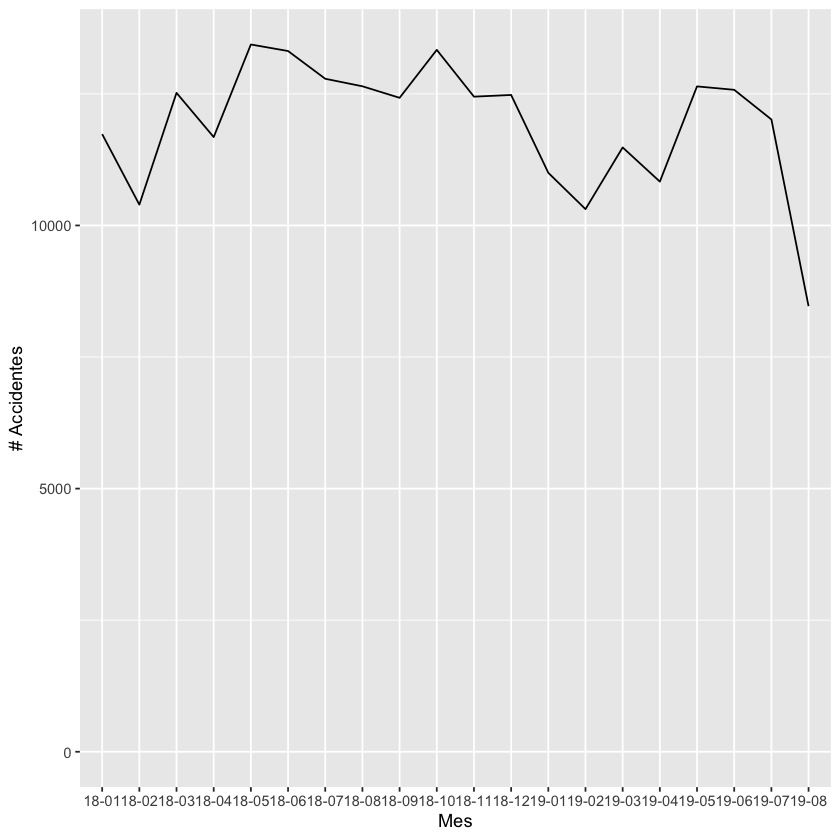

In [39]:
d %>% count(M.Y) %>% ggplot(aes(x=M.Y, y=n, group=1)) + geom_line() + xlab("Mes") + ylab("# Accidentes") + scale_y_continuous(limits = c(0, NA))

In [41]:
d$TIME <- strptime(d$TIME, "%H:%M")

In [44]:
d$T <- strftime(d$TIME, "%H")

In [45]:
d

DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,ON.STREET.NAME,NUMBER.OF.PEDESTRIANS.INJURED,NUMBER.OF.PEDESTRIANS.KILLED,NUMBER.OF.CYCLIST.INJURED,⋯,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,COLLISION_ID,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5,M.Y,T
<date>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2018-09-26,2024-06-28 12:12:00,BRONX,10454.0,40.808987,-73.911316,,0,0,0,⋯,,,3988123,Sedan,,,,,18-09,12
2018-09-25,2024-06-28 16:30:00,BROOKLYN,11236.0,40.636005,-73.91251,FLATLANDS AVENUE,1,0,0,⋯,,,3987962,Sedan,,,,,18-09,16
2019-08-22,2024-06-28 19:30:00,QUEENS,11101.0,40.75549,-73.93953,,0,0,0,⋯,,,4193132,Sedan,,,,,19-08,19
2018-09-23,2024-06-28 13:10:00,QUEENS,11367.0,,,MAIN STREET,0,0,1,⋯,,,3985962,Bike,Station Wagon/Sport Utility Vehicle,,,,18-09,13
2019-08-20,2024-06-28 22:40:00,BRONX,10468.0,40.868336,-73.90127,,0,0,0,⋯,,,4192111,Sedan,Sedan,,,,19-08,22
2019-08-20,2024-06-28 07:15:00,QUEENS,11354.0,,,,0,0,0,⋯,,,4191802,Sedan,,,,,19-08,07
2019-08-19,2024-06-28 12:00:00,QUEENS,11422.0,40.669327,-73.73533,241 STREET,0,0,0,⋯,,,4191196,Sedan,Sedan,,,,19-08,12
2018-09-22,2024-06-28 11:25:00,BRONX,10465.0,40.836227,-73.82292,,0,0,0,⋯,,,4004118,Sedan,,,,,18-09,11
2018-09-22,2024-06-28 15:56:00,BRONX,10451.0,40.819297999999996,-73.92188,,0,0,0,⋯,,,3985745,Sedan,,,,,18-09,15


Sera que existen horas con mas accidentes que otras? en la siguiente grafica se logra apreciar que la mayoria de accidente sucede entre las $16:00$ y las $18:00$.

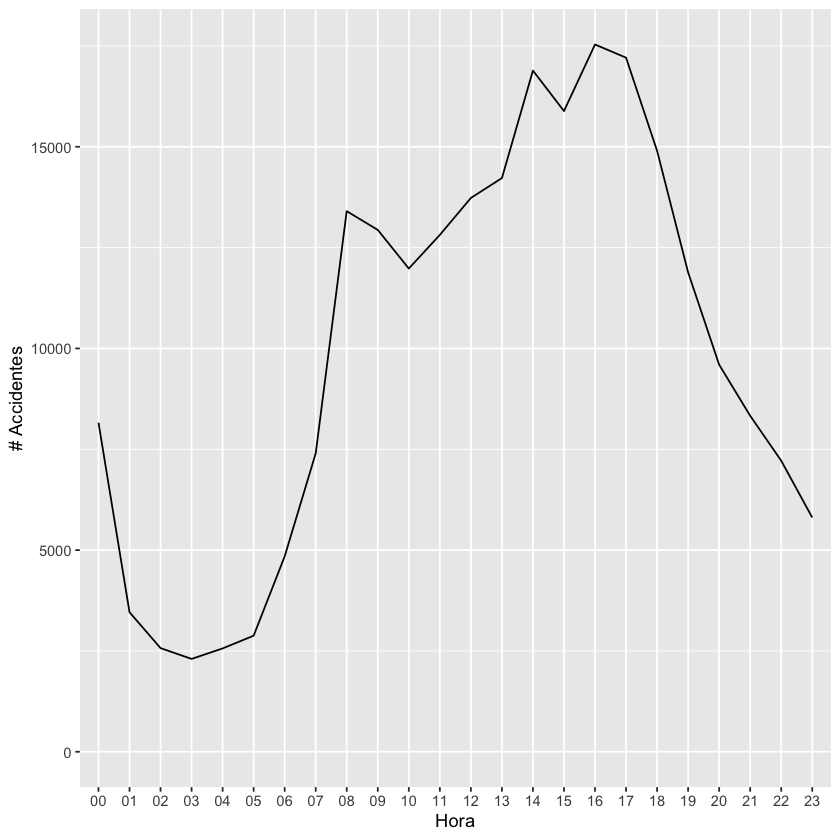

In [53]:
d %>% count(T) %>% ggplot(aes(x=T, y=n, group=1)) + geom_line() + xlab("Hora") + ylab("# Accidentes") + scale_y_continuous(limits = c(0, NA))

Tambien se evidencia que dicha variable sigue una distribucion normal.

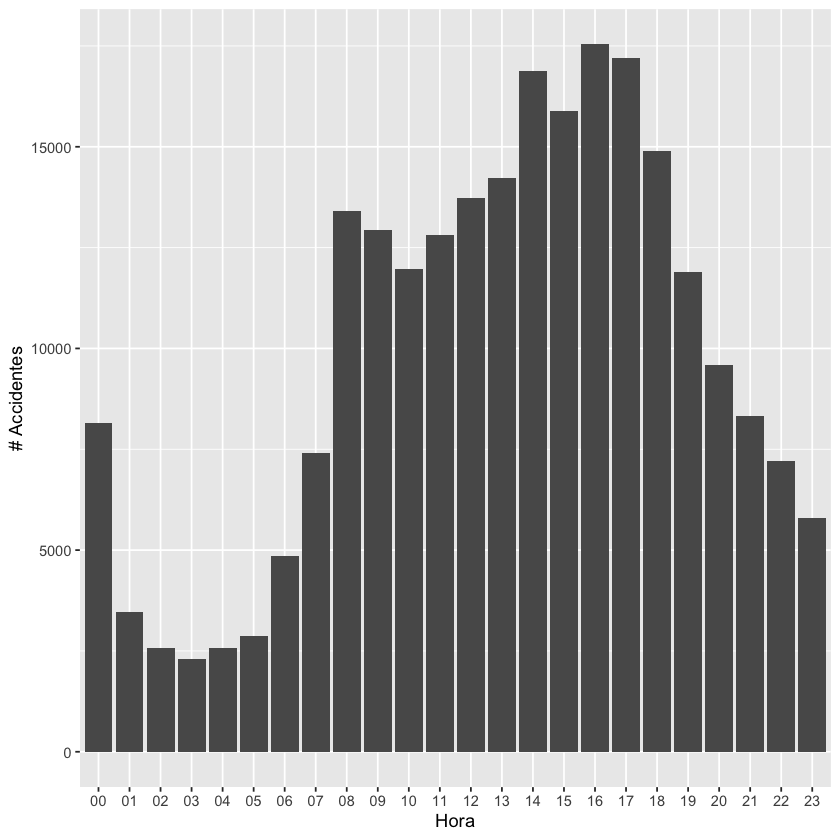

In [55]:
d %>% count(T) %>% ggplot(aes(x=T, y=n, group=1)) + geom_bar(stat = "identity") + xlab("Hora") + ylab("# Accidentes")

In [60]:
d$D <- weekdays(d$DATE)
d$D <- factor(d$D)

In [61]:
head(d)

,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,ON.STREET.NAME,NUMBER.OF.PEDESTRIANS.INJURED,NUMBER.OF.PEDESTRIANS.KILLED,NUMBER.OF.CYCLIST.INJURED,⋯,CONTRIBUTING.FACTOR.VEHICLE.5,COLLISION_ID,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5,M.Y,T,D
,<date>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,2018-09-26,2024-06-28 12:12:00,BRONX,10454.0,40.808987,-73.911316,,0,0,0,⋯,,3988123,Sedan,,,,,18-09,12,Wednesday
2,2018-09-25,2024-06-28 16:30:00,BROOKLYN,11236.0,40.636005,-73.91251,FLATLANDS AVENUE,1,0,0,⋯,,3987962,Sedan,,,,,18-09,16,Tuesday
3,2019-08-22,2024-06-28 19:30:00,QUEENS,11101.0,40.75549,-73.93953,,0,0,0,⋯,,4193132,Sedan,,,,,19-08,19,Thursday
4,2018-09-23,2024-06-28 13:10:00,QUEENS,11367.0,,,MAIN STREET,0,0,1,⋯,,3985962,Bike,Station Wagon/Sport Utility Vehicle,,,,18-09,13,Sunday
5,2019-08-20,2024-06-28 22:40:00,BRONX,10468.0,40.868336,-73.90127,,0,0,0,⋯,,4192111,Sedan,Sedan,,,,19-08,22,Tuesday
6,2019-08-20,2024-06-28 07:15:00,QUEENS,11354.0,,,,0,0,0,⋯,,4191802,Sedan,,,,,19-08,07,Tuesday


In [70]:
d %>% count(D) %>% arrange(D)

D,n
<fct>,<int>
Friday,37886
Monday,34719
Saturday,31784
Sunday,27040
Thursday,36254
Tuesday,35651
Wednesday,35188


Ahora seria interesante ver la relacion por dia, es evidente que el domingo sea el dia con menor tasa de accidentalidad,  y los dias entre semana se encuentran muy parejos.

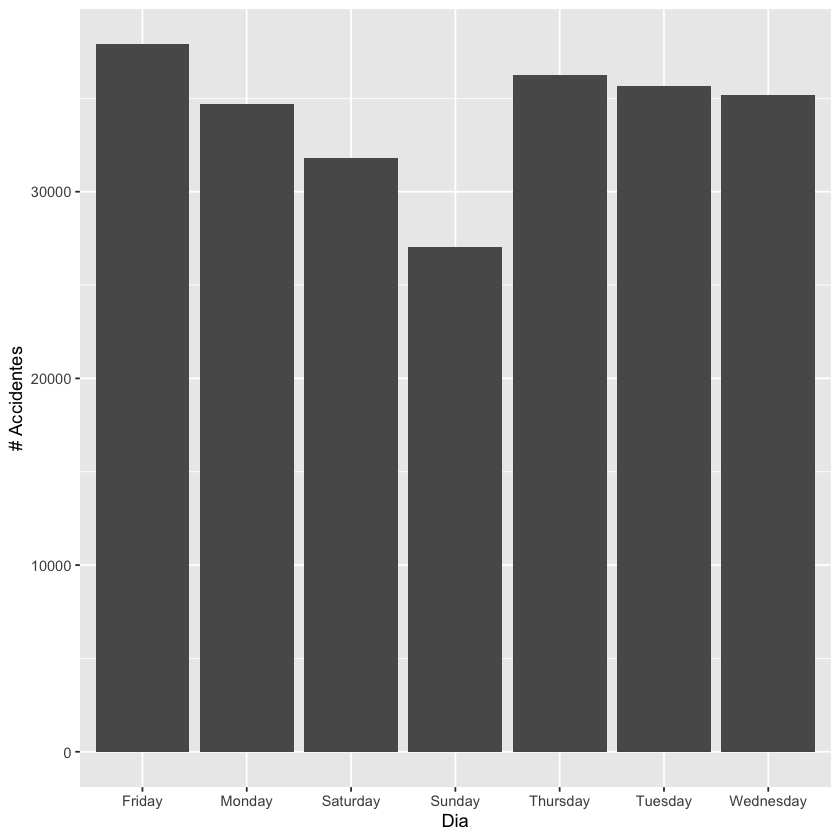

In [65]:
d %>% count(D) %>% arrange(D) %>% ggplot(aes(x=D, y=n, group=1)) + geom_bar(stat = "identity") + xlab("Dia") + ylab("# Accidentes")

Cual seria el distrito de New York con mas accidentes a lo largo del tiempo? Como se muestra en la grafica es posible que Manhatan. pero Manhatan es igual de grande en terreno que Staten Island? Evidentemente no, y por eso se explica que la grafica puede estar sesgada. 

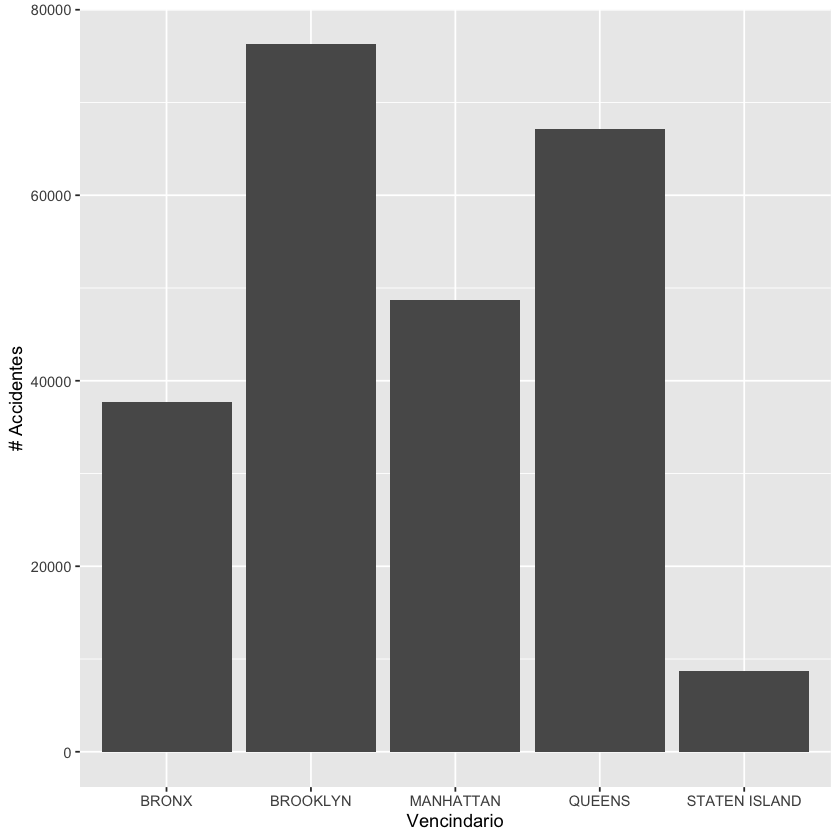

In [72]:
d %>% count(BOROUGH) %>% ggplot(aes(x=BOROUGH, y=n, group=1)) + geom_bar(stat = "identity") + xlab("Vencindario") + ylab("# Accidentes")

In [75]:
f <- read.csv2("./datasets/borough_data.csv", sep = ",", header = TRUE)

In [76]:
f

borough,population,area
<chr>,<int>,<chr>
the bronx,1471160,42.1
brooklyn,2648771,70.82
manhattan,1664727,22.83
queens,2358582,108.53
staten island,479458,58.37


In [78]:
f$borough <- toupper(f$borough)

In [79]:
f

borough,population,area
<chr>,<int>,<chr>
THE BRONX,1471160,42.1
BROOKLYN,2648771,70.82
MANHATTAN,1664727,22.83
QUEENS,2358582,108.53
STATEN ISLAND,479458,58.37


In [82]:
f$borough[1] <- "BRONX"

In [84]:
f

borough,population,area
<chr>,<int>,<chr>
BRONX,1471160,42.1
BROOKLYN,2648771,70.82
MANHATTAN,1664727,22.83
QUEENS,2358582,108.53
STATEN ISLAND,479458,58.37


In [86]:
i <- d %>% count(BOROUGH)

In [87]:
i

BOROUGH,n
<chr>,<int>
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


In [89]:
h <- left_join(x = i, y = f, by = c('BOROUGH' = 'borough'))

In [90]:
h

BOROUGH,n,population,area
<chr>,<int>,<int>,<chr>
BRONX,37709,1471160,42.1
BROOKLYN,76253,2648771,70.82
MANHATTAN,48749,1664727,22.83
QUEENS,67120,2358582,108.53
STATEN ISLAND,8691,479458,58.37


In [95]:
h$area <- as.numeric(h$area)

In [96]:
h

BOROUGH,n,population,area
<chr>,<int>,<int>,<dbl>
BRONX,37709,1471160,42.10
BROOKLYN,76253,2648771,70.82
MANHATTAN,48749,1664727,22.83
QUEENS,67120,2358582,108.53
STATEN ISLAND,8691,479458,58.37


In [101]:
a <- h %>% mutate(per_area = n / area)

Dada esta relacion, se visualiza el numero de accidentes por area y se logra visualizar que a mayor area mayor numero de accidentes.

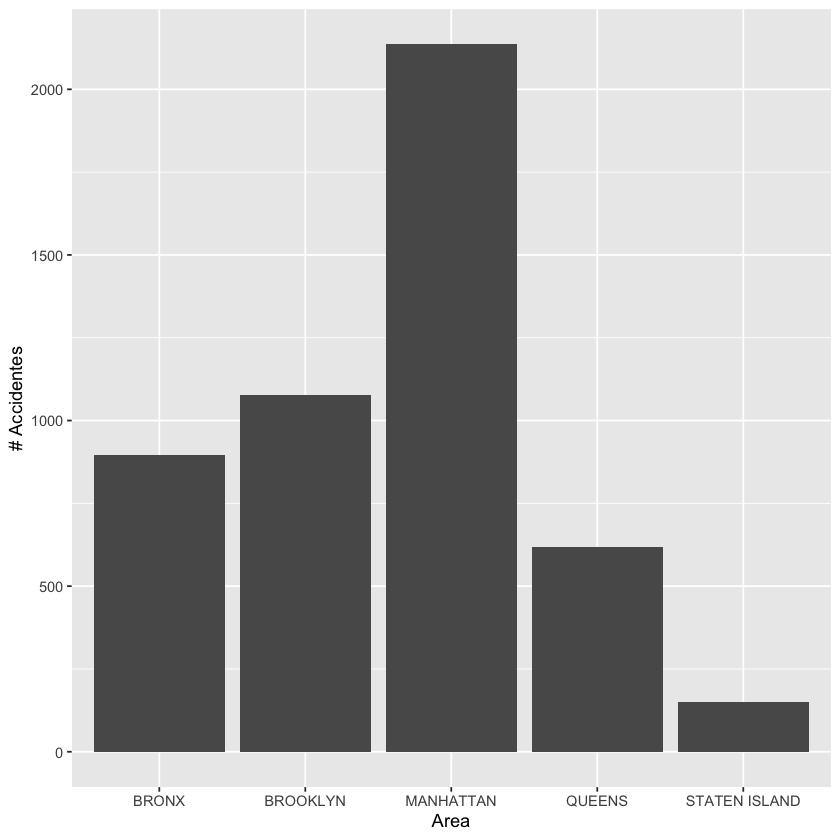

In [102]:
a %>% ggplot(aes(x=BOROUGH, y=per_area, group=1)) + geom_bar(stat = "identity") + xlab("Area") + ylab("# Accidentes")

Al comparar los distintos districtos de New York, vemos que su comportamiento es muy similar en relacion a su tamano, siguiendo una distribucion de probabilidad muy semejante a una normal.

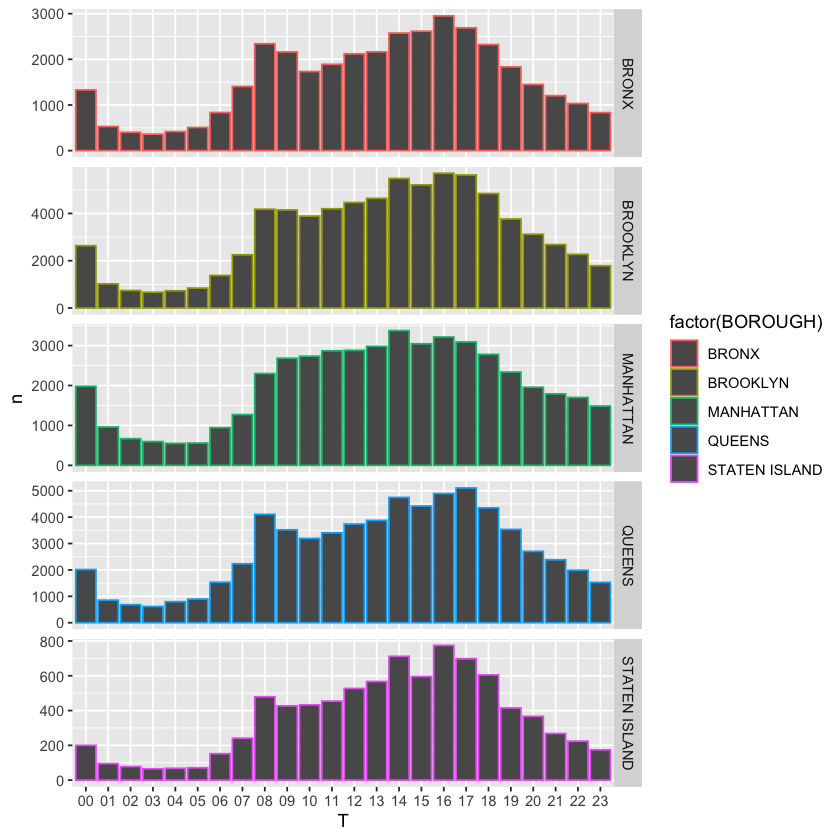

In [109]:
d %>% count(BOROUGH, T) %>% ggplot(aes(x = T, y = n, colour = factor(BOROUGH))) + geom_bar( stat = 'identity') + facet_grid(vars(BOROUGH), scales = "free")

# Conclusiones

Por si solo tanto el tamano, como el dia de la semana no determina el comportamiento en el numero de accidentes, por tal razon se establece la relacion por area para establecer un modelo de prediccion, que permita entender la evolucion de la variable en el tiempo.